## Wavelet_ image transform
### 2022.06.28    
### 2022.06.28 (update)
### 참고: https://pywavelets.readthedocs.io/en/latest/
### 결론: dwtbranch시, haar 와 부호만 달라지고 동일

#### 0. 필요한 모듈 import

In [1]:
import numpy as np
import pywt
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

#### 1.[input] image read & input jpg image 크기와 type 확인

In [2]:
img= cv2.imread("./data_samples/test_a10.JPG")

In [3]:
# # 실제 모델돌릴때 size어떻게 되나 확인 하기 위해서
# crop_size=512
# img=img[0:crop_size, 0:crop_size]

In [4]:
print("image type: ", type(img))
print("image shape: ", img.shape)
# print(img)

image type:  <class 'numpy.ndarray'>
image shape:  (922, 922, 3)


#### 1. [input] image whole & each channel 출력 -GBR & RGB순

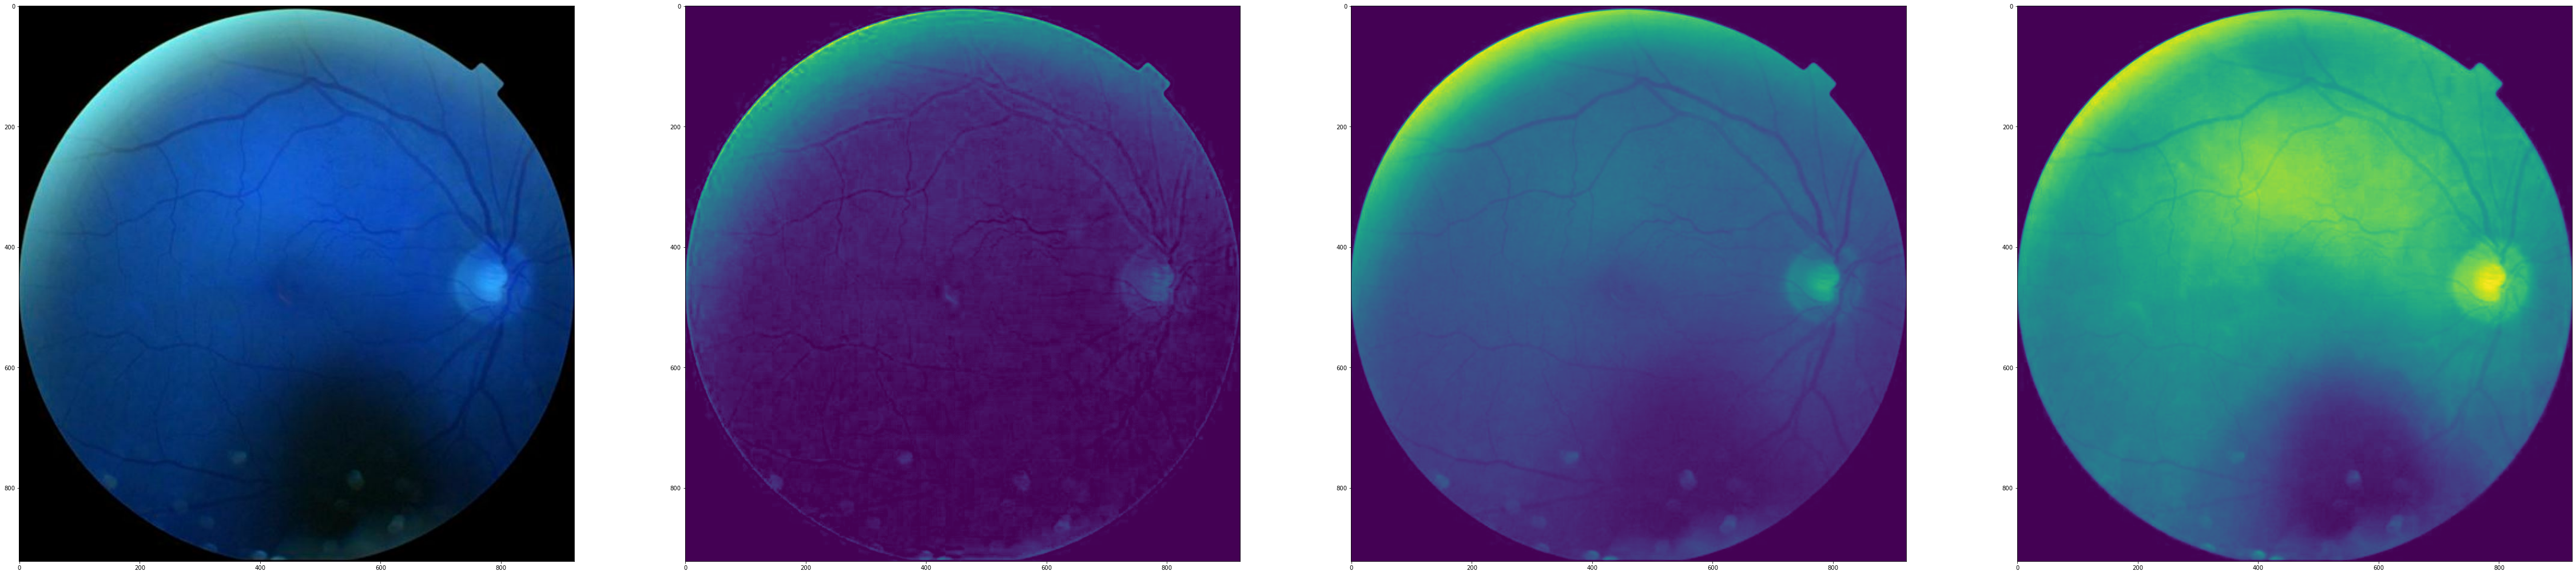

In [5]:
# CV는 BGR이라 이렇게 나옴
img_0 = img[:,:,0]
img_1 = img[:,:,1]
img_2 = img[:,:,2]

plt.figure(figsize=(80,20))
plt.subplot(1,4,1)
plt.imshow(img)
plt.subplot(1,4,2)
plt.imshow(img_0)
plt.subplot(1,4,3)
plt.imshow(img_1)
plt.subplot(1,4,4)
plt.imshow(img_2)
plt.show()

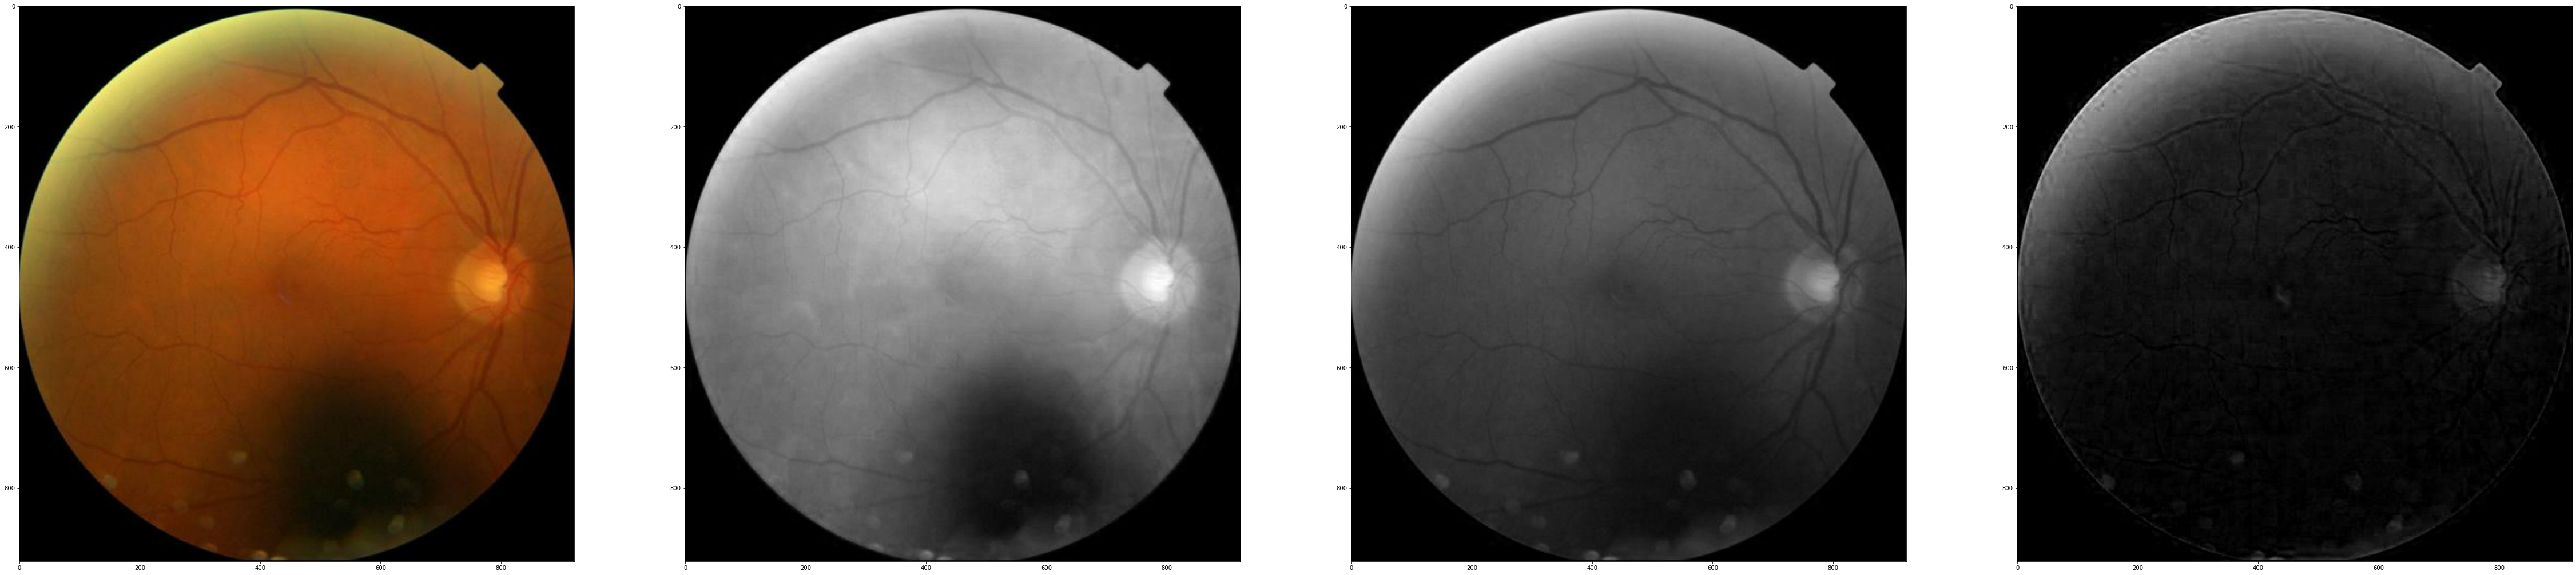

<class 'numpy.ndarray'>
(922, 922, 3)


In [6]:
imgc=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
imgc_0 = imgc[:,:,0]
imgc_1 = imgc[:,:,1]
imgc_2 = imgc[:,:,2]

plt.figure(figsize=(80,20))
plt.subplot(1,4,1)
plt.imshow(imgc)
plt.subplot(1,4,2)
plt.imshow(imgc_0, cmap=plt.cm.gray)
plt.subplot(1,4,3)
plt.imshow(imgc_1, cmap=plt.cm.gray)
plt.subplot(1,4,4)
plt.imshow(imgc_2, cmap=plt.cm.gray)
plt.show()
print(type(imgc))
print(imgc.shape)

#### ⚡2. [transform] 각 chanel별로wavelt transform - RED, GREEN, BLUE 순으로 

In [18]:

def dwgan_dwtbranch(a):
    x01 = a[ 0::2, :] / 2
    x02 = a[ 1::2, :] / 2
    x1 = x01[:, 0::2]
    x2 = x02[ :, 0::2]
    x3 = x01[ :, 1::2]
    x4 = x02[ :, 1::2]
    LL = x1 + x2 + x3 + x4
    HL = -x1 - x2 + x3 + x4
    LH = -x1 + x2 - x3 + x4
    HH = x1 - x2 - x3 + x4
    return LL,LH,HL,HH

Red

i:  0
<class 'numpy.ndarray'>
(461, 461)
i:  1
<class 'numpy.ndarray'>
(461, 461)
i:  2
<class 'numpy.ndarray'>
(461, 461)
i:  3
<class 'numpy.ndarray'>
(461, 461)


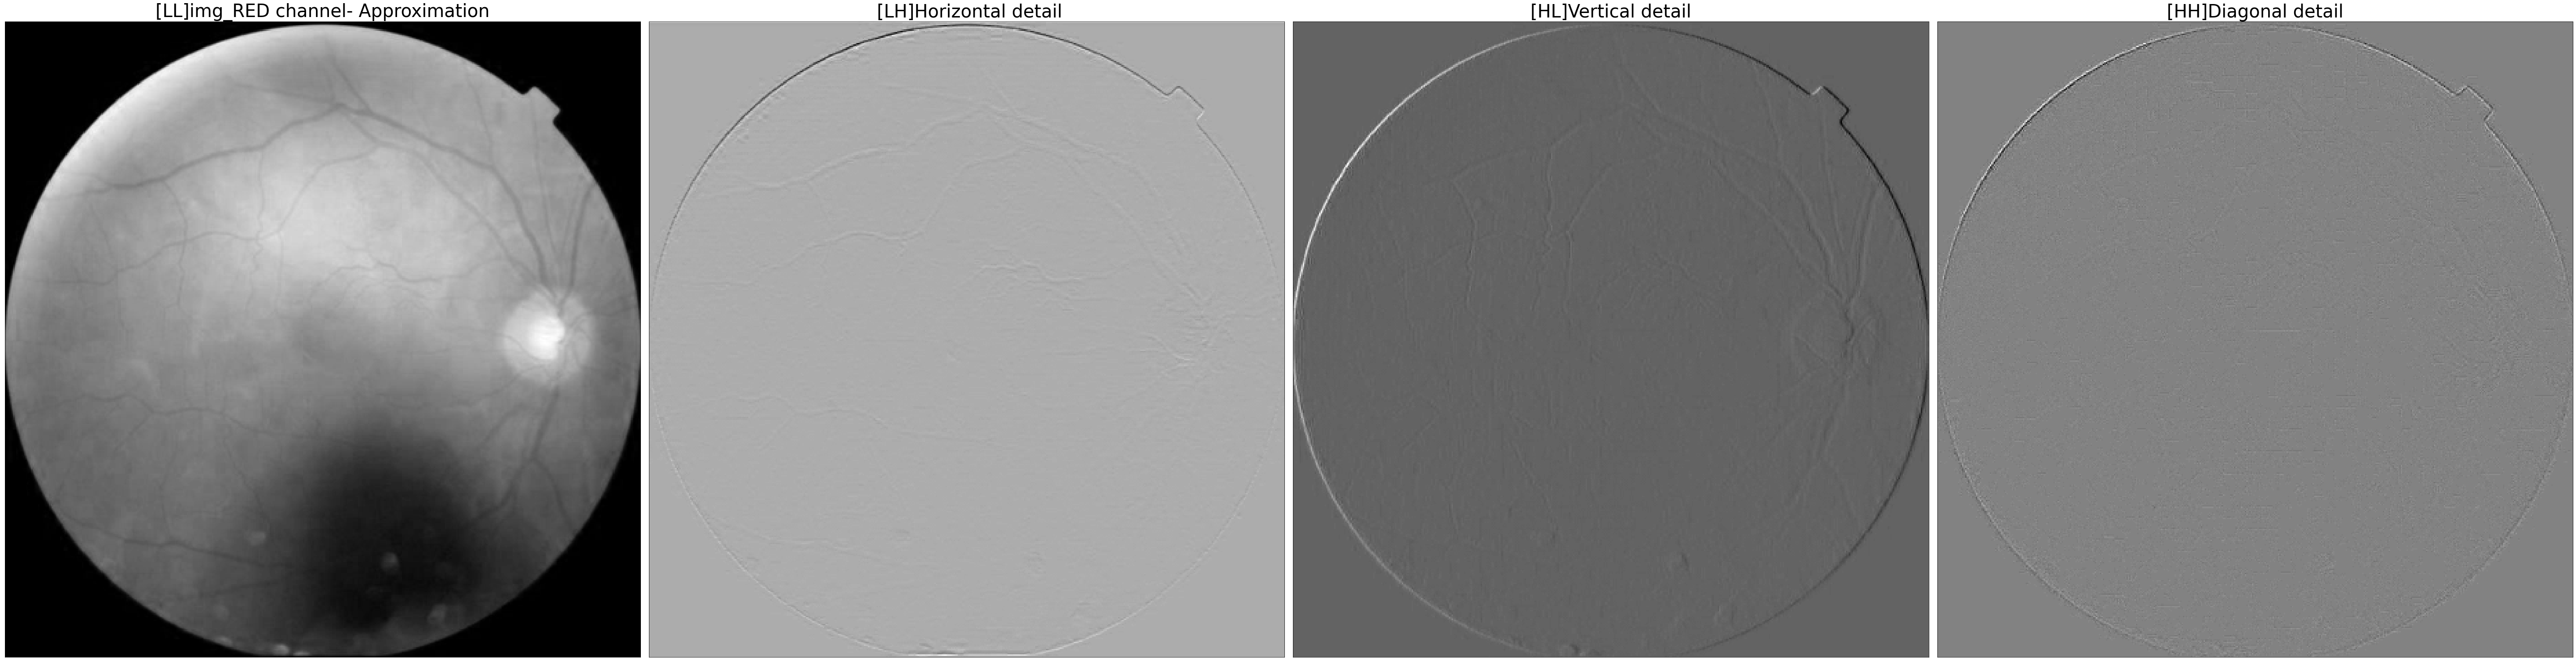

In [19]:
titles = ['[LL]img_RED channel- Approximation', ' [LH]Horizontal detail',
          '[HL]Vertical detail', '[HH]Diagonal detail']
fig = plt.figure(figsize=(80,20))

LL,HH,HL,HH = dwgan_dwtbranch(imgc_0)
for i, t in enumerate([LL, LH, HL, HH]):
    print("i: ",i)
    print(type(t))
    print(t.shape)
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(t, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=40)
    ax.set_xticks([]) # 안하면, 눈금 생김
    ax.set_yticks([])

fig.tight_layout()
plt.show()

Green

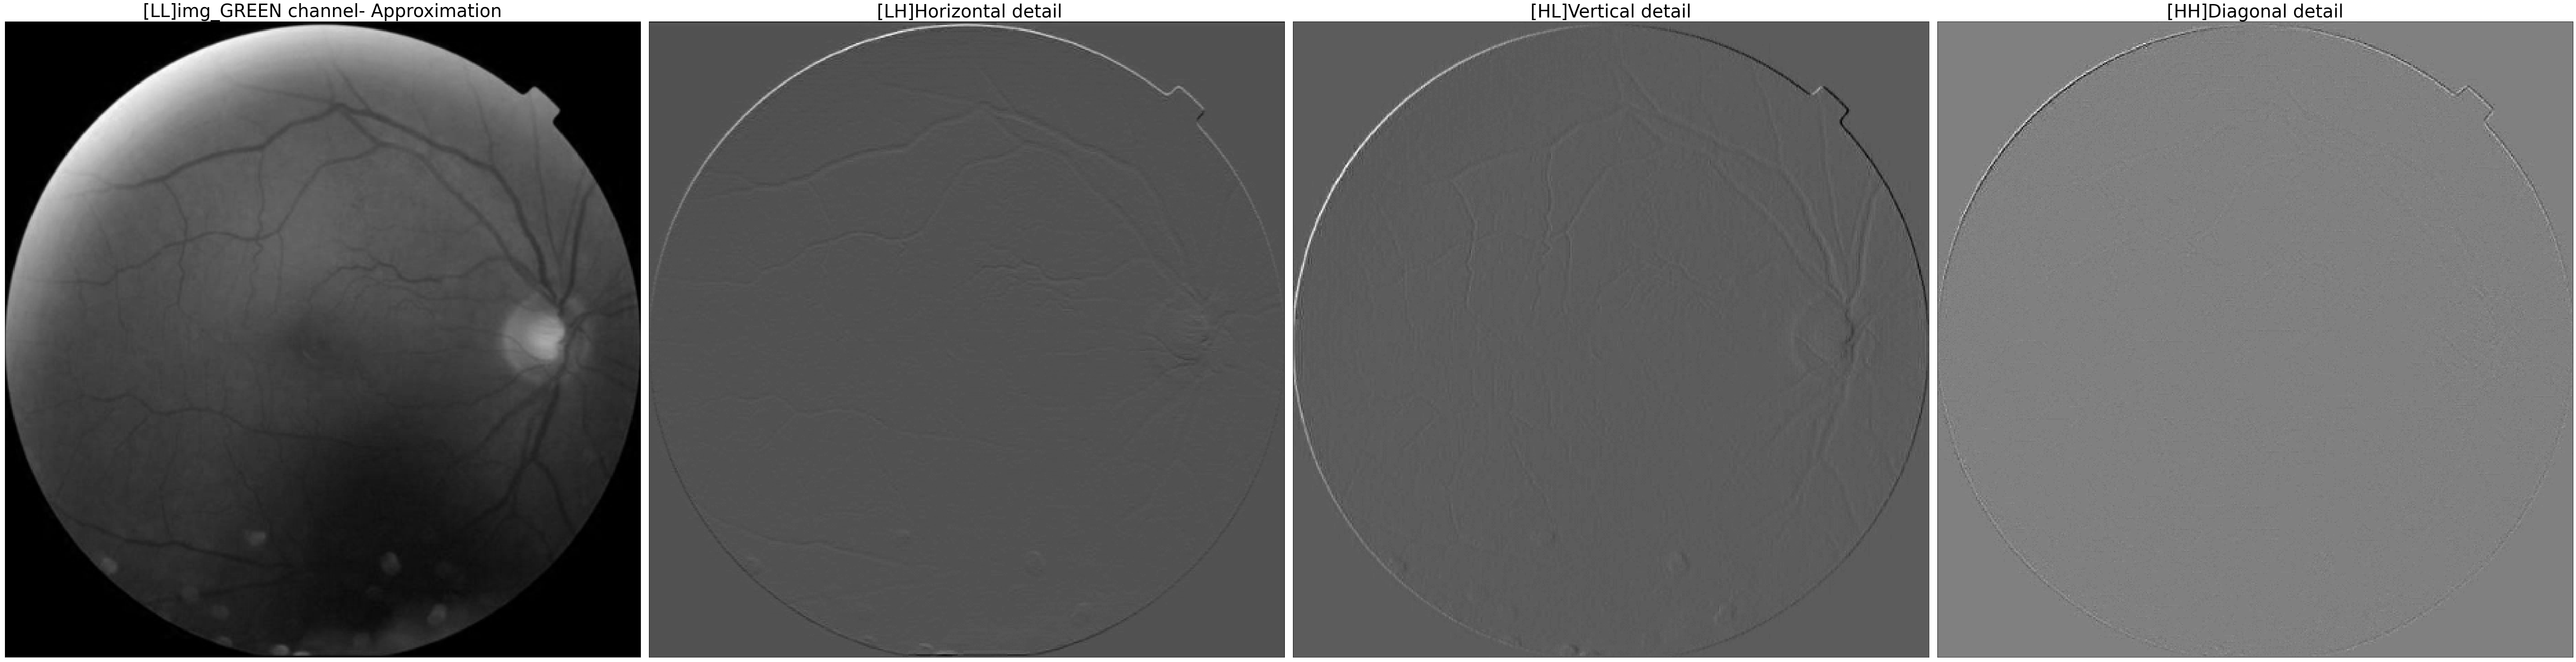

In [20]:
titles = ['[LL]img_GREEN channel- Approximation', ' [LH]Horizontal detail',
          '[HL]Vertical detail', '[HH]Diagonal detail']
LL,LH,HL,HH = dwgan_dwtbranch(imgc_1)
fig = plt.figure(figsize=(80,20))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a,  cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=40)
    ax.set_xticks([]) # 안하면, 
    ax.set_yticks([])

fig.tight_layout()
plt.show()

pywt - haar사용시
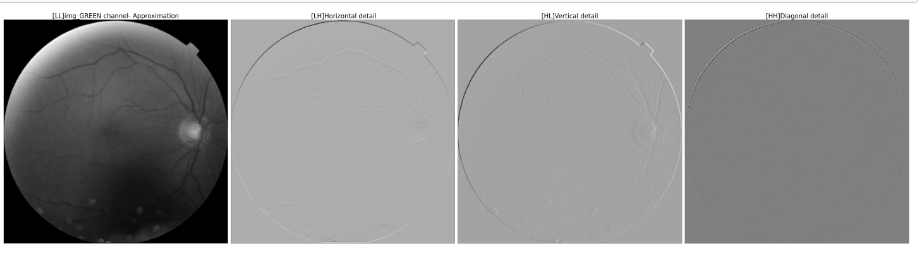

Blue - harr

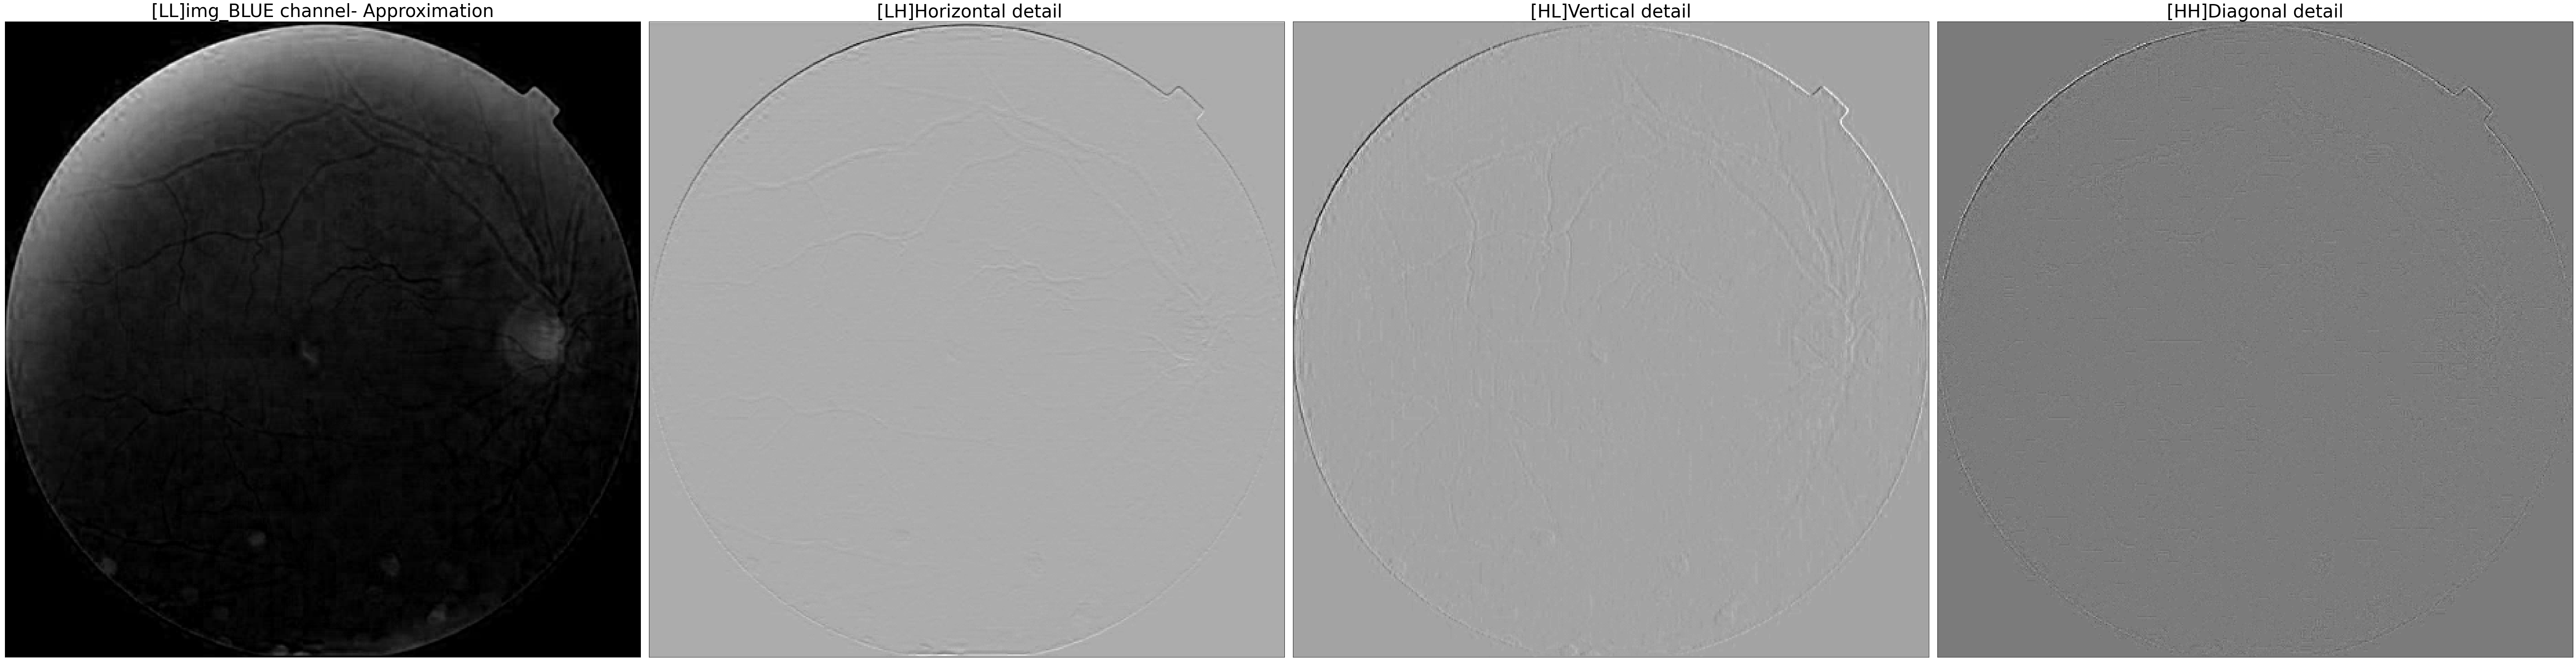

LL.max(): 334.00000000000006
LL.min(): 0.0

LH.max(): 38.5
LH.min(): -79.50000000000001

HL.max(): 28.500000000000007
HL.min(): -50.50000000000003

HH.max(): 13.500000000000002
HH.min(): -12.500000000000002


In [27]:
titles = ['[LL]img_BLUE channel- Approximation', ' [LH]Horizontal detail',
          '[HL]Vertical detail', '[HH]Diagonal detail']
coeffs2 = pywt.dwt2(imgc_2, 'haar')
LL, (LH, HL, HH) = coeffs2
fig =plt.figure(figsize=(80,20))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=40)
    ax.set_xticks([]) # 안하면, 
    ax.set_yticks([])

fig.tight_layout()
plt.show()
print("LL.max():", LL.max())
print("LL.min():", LL.min())
print()
print("LH.max():", LH.max())
print("LH.min():", LH.min())
print()
print("HL.max():", HL.max())
print("HL.min():", HL.min())
print()
print("HH.max():", HH.max())
print("HH.min():", HH.min())

blue- dwgan ver

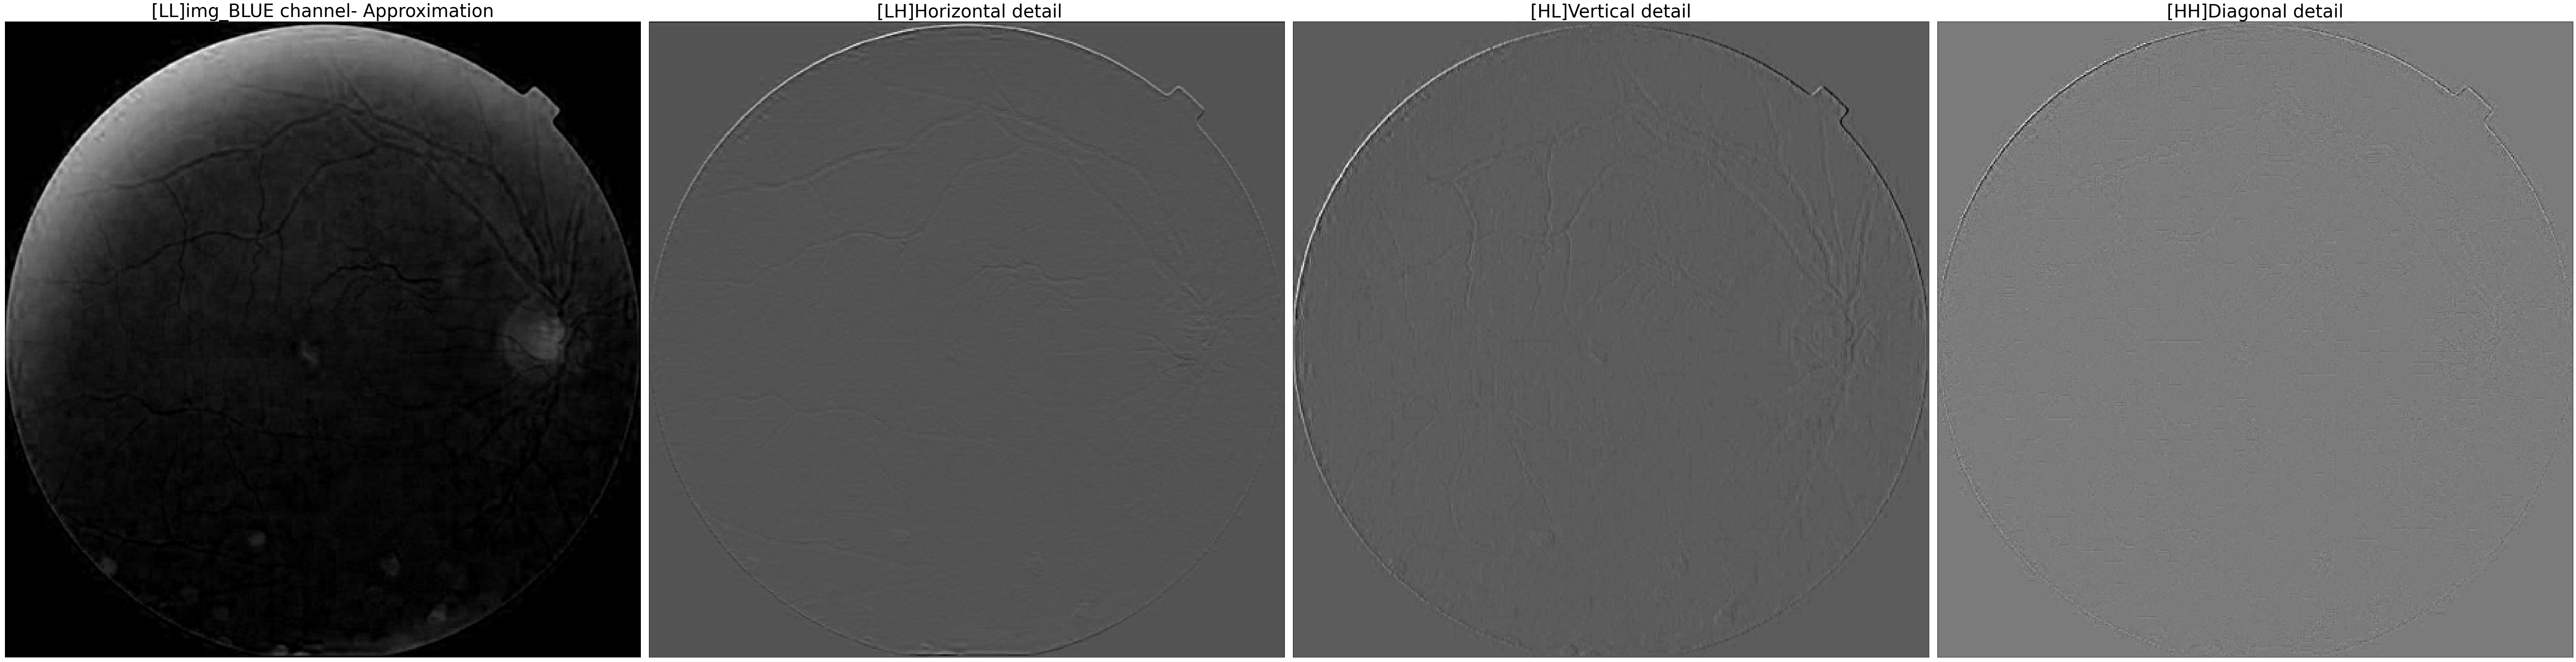

LL.max(): 334.0
LL.min(): 0.0

LH.max(): 79.5
LH.min(): -38.5

HL.max(): 50.5
HL.min(): -28.5

HH.max(): 13.5
HH.min(): -12.5


In [26]:
titles = ['[LL]img_BLUE channel- Approximation', ' [LH]Horizontal detail',
          '[HL]Vertical detail', '[HH]Diagonal detail']
LL,LH,HL,HH = dwgan_dwtbranch(imgc_2)
fig =plt.figure(figsize=(80,20))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=40)
    ax.set_xticks([]) # 안하면, 
    ax.set_yticks([])

fig.tight_layout()
plt.show()
print("LL.max():", LL.max())
print("LL.min():", LL.min())
print()
print("LH.max():", LH.max())
print("LH.min():", LH.min())
print()
print("HL.max():", HL.max())
print("HL.min():", HL.min())
print()
print("HH.max():", HH.max())
print("HH.min():", HH.min())

#### 3. [inverse dwt] size & 출력결과확인
coeffs: rgb->각각을 dwt한 것   
i : coeffs -> rgb로 다시 idwt한 것   
ii : i -> int형식으로 변환한 것   
rimg : ii들을 concat한 것

In [12]:
# idwt
i0 = pywt.idwt2(coeffs0, 'bior1.3')
i1 = pywt.idwt2(coeffs1, 'bior1.3')
i2 = pywt.idwt2(coeffs2, 'bior1.3')
print(type(coeffs0))

<class 'tuple'>


In [13]:
#  int type
ii0=i0.astype(int)
ii1=i1.astype(int)
ii2=i2.astype(int)
print("1. original shape:", imgc_0.shape) 
print("2. after dwt shape:", coeffs0[0].shape)
print("3. after idwt shape:",ii0.shape)
print("original  ==  dwtidwt iamge:", imgc_0.shape==ii0.shape)

1. original shape: (922, 922)
2. after dwt shape: (461, 461)
3. after idwt shape: (918, 918)
original  ==  dwtidwt iamge: False


512size로 crop했을 때는 항상 dwt & idwt일정한듯  & ori size == idwt size 동일
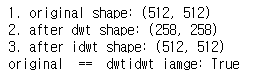

In [14]:
# rimg = np.array([ii0, ii1, ii2]).reshape(512,512,3)
# print(rimg.shape)
# plt.imshow(rimg)
# plt.show()

(918, 918, 3)


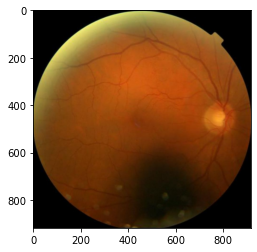

In [15]:
rimg = cv2.merge((ii0, ii1,ii2))
print(rimg.shape)
plt.imshow(rimg)
plt.show()